# project: no-show appointments
this file contains more than 110 thousands patient data.
the main question is will the patients go to their appointsment with the doctor. 
the main question is, does it help to send the patients sms reminders for their next appointment? and does a special group of people miss their appointments more often than the other groups?

#### first import all the notebook extension and then we load the file

In [18]:
import pandas as pd
import numpy as np
# why does the underneath line does not work anymore?
#import plotly.plotly as py
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

data = pd.read_csv("data.csv")
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


##### second step 
we do the data wrangling and cleaning our file 

In [2]:
# first we want to know how big our data file is. we got 110527 rows and 14 columns
data.shape

(110527, 14)

###### the file is checked for NAN values. but there are none. 

In [3]:
# we count all our nan values to find them. 
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### delete columns that are no longer necessary.  we don´t need every column for our investigation. if we delete this columns our data file will be easier to read. 

In [7]:
# we delete the column with the patient id and the appointmentid
data.drop(["PatientId", "AppointmentID"], axis = 1, inplace= True)

In [4]:
# we print the head again, to check if it had worked. 
data.head(15)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


##### every columns shall be in lowercase, to make it easier.  in the further investigation we will only need to write everythink in lowercase. 

In [5]:
# we make sure that every columnname will be in lowercase and we check this out. 
data.rename(columns= lambda x: x.lower(), inplace=True)
data.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


##### delete all cells with an age under 0 or over 100, as this is most unlikely.  then we check our results 

In [6]:
# we just want to take all the data where the age is 0  until 100 years. all the other figures will be most likely a typo
data = data.query("(age > 0.) and (age < 100)")
data.shape

(106976, 14)

#### we want to find out more about the age of our patients. 

In [7]:
# the describe method will give us the mean, std, and the complete range of all ages. 
data["age"].describe()

count    106976.000000
mean         38.309004
std          22.456395
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max          99.000000
Name: age, dtype: float64

#### draw a few histogramms to get an overview about the data. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AF85407320>,
      dtype=object)

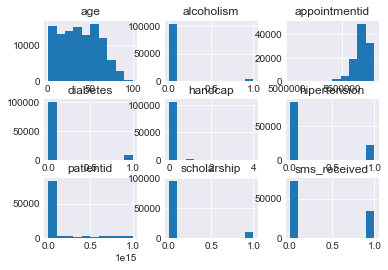

In [8]:
# with this method we can just check what data are look like in a histogramm. will we find anythink remarkable, worth for a futher check?
data.hist()

# part two
## now after the cleaning of our data we will take a close look at them.


### what gender got our patients? normally we would expect it half /half, but is this really the case?

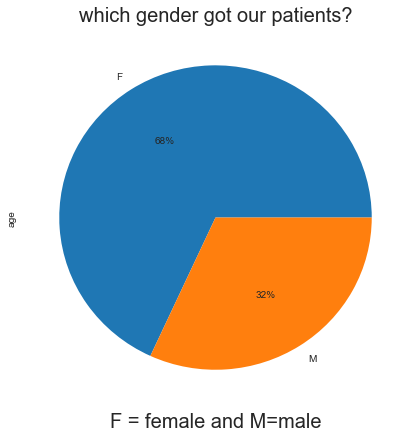

In [9]:
# we group our data into male and female. 
plt.title("which gender got our patients?", fontsize =20)
plt.xlabel("F = female and M=male", fontsize =20)
data.groupby('gender').sum().age.plot(kind="pie", autopct='%1.0f%%', figsize=(7,7))


##### 68% of all patients are female and only 32% are male. this may be the reason why women worldwide have a higher life expectancy than men. women are more inclined to call a doctor for physical complaints, while male patients only seek medical advice in emergencies. in germany the figures are nearly the same. a working women goes to a doctor on average 7 times and a working man only 4,2 times on average. 

#  what age got our patients?

Text(0.5,1,'what age got our patients?')

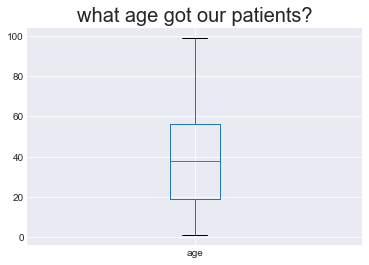

In [10]:
# we do a boxplot checking the age of our patients. this boxpot shows us the min value, the first quartile, mean, 
# the third quartile and the max value. 
data["age"].plot(kind="box")
plt.title("what age got our patients?", fontsize =20)


# the sex of persons who are alcoholic

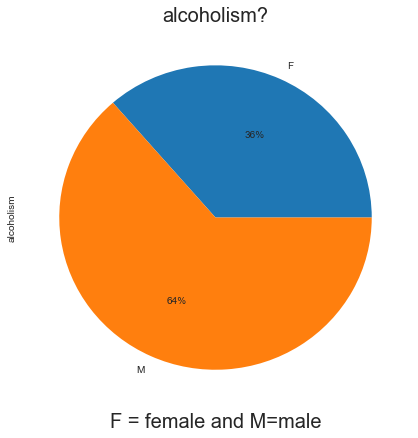

In [11]:
# we draw a piechart, with the female and male person which are drug addicted. 
plt.title("alcoholism?", fontsize =20)
plt.xlabel("F = female and M=male", fontsize =20)
data.groupby('gender').sum().alcoholism.plot(kind="pie", autopct='%1.0f%%', figsize=(7,7))

#####  64% of alcoholic patients are male and only 36% are female. men are probably more prone to this disease because alcoholised women are perceived as negative by the public. while excessive alcohol consumption is more tolerated in men. 

# calculate all the percentage of different groups, who have not shown up

In [12]:
# calculate the percentage of alcoholic persons who have not shown up. 
data_alcohol = data.query('alcoholism =="1"')
print (data_alcohol.shape)
print (data_alcohol["no-show"].value_counts())
alcohol_noshow_pct = int(100/3360*677)
print (alcohol_noshow_pct)

(3360, 14)
No     2683
Yes     677
Name: no-show, dtype: int64
20


In [13]:
# calculate the percentage of scholarship persons who have not shown up
data_scholarship = data.query('scholarship =="1"')
print (data_scholarship.shape)
print (data_scholarship["no-show"].value_counts())
scholarship_noshow_pct = int(100/10809*2571)
print (scholarship_noshow_pct)


(10809, 14)
No     8238
Yes    2571
Name: no-show, dtype: int64
23


In [48]:
# calculate the percentage of hipertension persons who have not shown up
data_hipertension = data.query('hipertension =="1"')
print (data_hipertension.shape)
print (data_hipertension["no-show"].value_counts())
hipertension_noshow_pct = int(100/21800*3772)
print (hipertension_noshow_pct)

(21800, 12)
No     18028
Yes     3772
Name: no-show, dtype: int64
17


In [17]:
## calculate the percentage of diabets persons who have not shown up
data_diabetes = data.query('diabetes =="1"')
print (data_diabetes.shape)
print (data_diabetes["no-show"].value_counts())
diabetes_noshow_pct = int(100/7943*1430)
print (diabetes_noshow_pct)

(7943, 12)
No     6513
Yes    1430
Name: no-show, dtype: int64
18


In [18]:
## calculate the percentage of handcap persons who have not shown up
data_handcap = data.query('handcap =="1"')
print (data_handcap.shape)
print (data_handcap["no-show"].value_counts())
handcap_noshow_pct = int(100/2035*363)
print (handcap_noshow_pct)

(2035, 12)
No     1672
Yes     363
Name: no-show, dtype: int64
17


In [19]:
## calculate the percentage person who have received a sms and have not shown up
data_sms_received = data.query('sms_received =="1"')
print (data_sms_received.shape)
print (data_sms_received["no-show"].value_counts())
sms_received_noshow_pct = int(100/34583*9568)
print (sms_received_noshow_pct)

(34583, 12)
No     25015
Yes     9568
Name: no-show, dtype: int64
27


In [21]:
# calculate the percentage of female persons who have not shown up
data_female = data.query('gender =="F"')
print (data_female.shape)
print (data_female["no-show"].value_counts())
female_noshow_pct =int(100/70109*14272)
print ("female percentage is", female_noshow_pct)

# calculate the percentage of female persons who have not shown up
data_male = data.query('gender == "M"')
print (data_male.shape)
print (data_male["no-show"].value_counts())
male_noshow_pct = int(100/36867*7405)
print ("male percentage is", male_noshow_pct)


(70109, 12)
No     55837
Yes    14272
Name: no-show, dtype: int64
female percentage is 20
(36867, 12)
No     29462
Yes     7405
Name: no-show, dtype: int64
male percentage is 20


([<matplotlib.axis.XTick at 0x2af85c0aac8>,
 <a list of 8 Text xticklabel objects>)

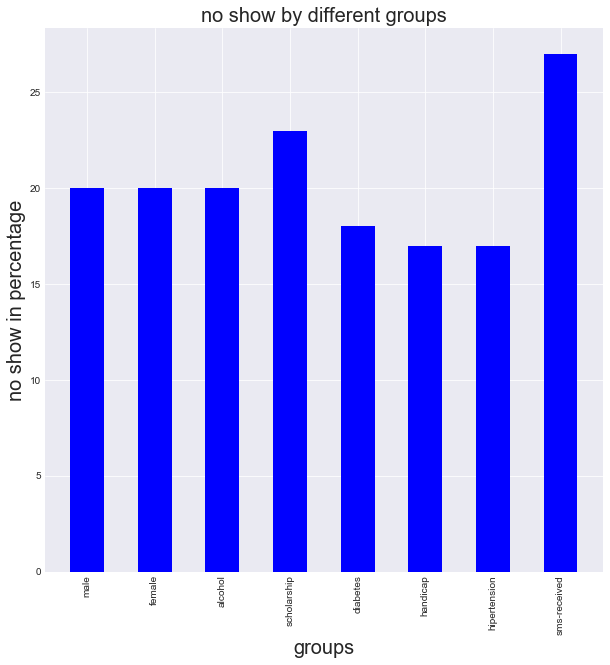

In [17]:
x = ['male', "female", "alcohol", "scholarship", "diabetes", "handicap", "hipertension", "sms-received"]
noshow = [20,20,20,23,18,17,17,27]

x_pos = [i for i, _ in enumerate(x)]

plt.figure(figsize=(10,10))
plt.bar(x_pos, noshow, align="center", width =0.5, color='blue')
plt.xlabel("groups", fontsize =20)
plt.ylabel("no show in percentage", fontsize =20)

plt.title("no show by different groups", fontsize =20, loc ="center")
plt.xticks(x_pos, x, rotation=90,)

##### now it gets really interesting. the graphic clearly shows that there is no difference between men and women. even alcoholics do not skip medical appointments more often than the average. people with a disability and with diabetes are even more reliable than the average. but patients who even get a sms to remember do not come more often than the average. this result is really very striking. if the doctors wanted to achieve the opposite with the sms. 


## what was the limitation of our data? 
#### first the data file shows only a little part of the patient data of the big country brasil.  brasilien got a population of 207,7 millions habitants. 
#### secondly, it does not consider that the people which have not shown up maybe cannot afford the costs for the public transportation system, that it is voyage is not safe enough, that the doctor is too far away and so on. 
#### maybe the content of the sms was in some way wrongly formulated and therefore a disproportionate number of people stayed away from their appointment. 


### conclusion 
#### is their a special group of people that miss their appointsment with the doctor more often than others?
##### with severe chronic disease would more often not be able to attend to your medical appointments. but this is not the case.  The rate of unfulfilled appointments is between 17-20% for the different groups. Even alcoholics and disabled persons have an error rate of only 20 and 23 percent, respectively. Also, there is no difference between the sexes, both have an error rate of 20%.   Based on this result, further research is needed. One would have to contact all patients with absences directly and ask where the problem was. 

##### What is remarkable, however, is that the people who received a sms reminder have an error rate of 27%. There is an urgent need for further investigation here. Perhaps these patients found the text message intrusive or the reminder text was formulated unfavourably. 

##### so all that can be said at the moment is that the results did not meet expectations at all. And that the actually good sounding idea to send a sms to the patients had the opposite success. 


####### source: http://www.faz.net/aktuell/wirtschaft/frauen-fehlen-haeufiger-wegen-krankheit-als-maenner-14125823.html